# Implemeting an Autoencoder in Pytorch on the MNIST dataset

In [18]:
!pip install torch

In [19]:
!pip install matplotlib

In [20]:
!pip install torchvision

In [21]:
!pip install numpy

In [22]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import torch.optim as optim
from torchvision import datasets, transforms

In [ ]:
# transfrom the images to pt tensors
transforms1 = transforms.ToTensor()
# turn to tensor
# appy other image transformations

transforms2 = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5), (0.5))]
)

mnist_data = datasets.MNIST(
    root="../data", download=True, transform=transforms1, train=True
)

In [24]:
print(mnist_data.__doc__)

`MNIST <http://yann.lecun.com/exdb/mnist/>`_ Dataset.

    Args:
        root (str or ``pathlib.Path``): Root directory of dataset where ``MNIST/raw/train-images-idx3-ubyte``
            and  ``MNIST/raw/t10k-images-idx3-ubyte`` exist.
        train (bool, optional): If True, creates dataset from ``train-images-idx3-ubyte``,
            otherwise from ``t10k-images-idx3-ubyte``.
        download (bool, optional): If True, downloads the dataset from the internet and
            puts it in root directory. If dataset is already downloaded, it is not
            downloaded again.
        transform (callable, optional): A function/transform that  takes in a PIL image
            and returns a transformed version. E.g, ``transforms.RandomCrop``
        target_transform (callable, optional): A function/transform that takes in the
            target and transforms it.
    


In [25]:
print(mnist_data)

Dataset MNIST
    Number of datapoints: 60000
    Root location: ../data
    Split: Train
    StandardTransform
Transform: ToTensor()


In [26]:
data_loader = torch.utils.data.DataLoader(
    dataset=mnist_data, batch_size=64, shuffle=True
)

In [27]:
import numpy

print(numpy.__version__)

2.2.0


In [28]:
# call an iterator for th eimages
data_iterator = iter(data_loader)
images, labels = next(data_iterator)
print(torch.min(images), torch.max(images))

tensor(0.) tensor(1.)


In [29]:
images[0].shape

torch.Size([1, 28, 28])

In [48]:
class AutoencoderLinear(nn.Module):
    def __init__(self):
        super().__init__()
        # define the encoder
        #  (n,784)
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128),  # (n,784) => (n,128)
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 12),
            nn.ReLU(),
            nn.Linear(12, 3),  # (n,12) => (n,3) Huge decrease in size
        )
        # bottlenack in between ( latent space )
        # define the decoder
        self.decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.ReLU(),
            nn.Linear(12, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28 * 28),
            nn.Sigmoid(),  # because the tensors range between 0 and 1
            # if we applied other transforms like normalization
            # nn.Tanh()
        )

    def forward(self, X):
        """forward propagation"""
        encoded = (self.encoder(X),)
        decoded = self.decoder(encoded)
        return decoded

In [49]:
model1 = AutoencoderLinear()

In [83]:
class AutoEncoderImg(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 32, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, 7),
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, 7),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, 3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid(),
        )

    def forward(self, X):
        encoded = self.encoder(X)
        decoded = self.decoder(encoded)
        return decoded

In [84]:
model2 = AutoEncoderImg()

In [85]:
criterion = nn.MSELoss()
print(criterion.__doc__)

Creates a criterion that measures the mean squared error (squared L2 norm) between
    each element in the input :math:`x` and target :math:`y`.

    The unreduced (i.e. with :attr:`reduction` set to ``'none'``) loss can be described as:

    .. math::
        \ell(x, y) = L = \{l_1,\dots,l_N\}^\top, \quad
        l_n = \left( x_n - y_n \right)^2,

    where :math:`N` is the batch size. If :attr:`reduction` is not ``'none'``
    (default ``'mean'``), then:

    .. math::
        \ell(x, y) =
        \begin{cases}
            \operatorname{mean}(L), &  \text{if reduction} = \text{`mean';}\\
            \operatorname{sum}(L),  &  \text{if reduction} = \text{`sum'.}
        \end{cases}

    :math:`x` and :math:`y` are tensors of arbitrary shapes with a total
    of :math:`N` elements each.

    The mean operation still operates over all the elements, and divides by :math:`N`.

    The division by :math:`N` can be avoided if one sets ``reduction = 'sum'``.

    Args:
        size_average (

In [86]:
model2_params = model2.parameters
model2_params

<bound method Module.parameters of AutoEncoderImg(
  (encoder): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(32, 64, kernel_size=(7, 7), stride=(1, 1))
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(64, 32, kernel_size=(7, 7), stride=(1, 1))
    (1): ReLU()
    (2): ConvTranspose2d(32, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (3): ReLU()
    (4): ConvTranspose2d(16, 1, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (5): Sigmoid()
  )
)>

In [87]:
print(list(model2.parameters()))

[Parameter containing:
tensor([[[[ 0.1119, -0.2151, -0.0529],
          [-0.0125, -0.1831,  0.2777],
          [ 0.2062,  0.0681,  0.1425]]],


        [[[-0.0743, -0.3200, -0.1999],
          [-0.0657, -0.1749, -0.1112],
          [ 0.2072, -0.2565,  0.0110]]],


        [[[ 0.0009,  0.1351, -0.0271],
          [ 0.0869, -0.3299, -0.0540],
          [ 0.1695, -0.0062, -0.2114]]],


        [[[-0.1013, -0.1455,  0.0214],
          [-0.0057,  0.1393, -0.3127],
          [ 0.0871, -0.1804,  0.0855]]],


        [[[ 0.0302, -0.1782,  0.1889],
          [-0.3213,  0.1300,  0.2702],
          [-0.1356,  0.2534, -0.1263]]],


        [[[-0.1941, -0.1341, -0.3188],
          [ 0.1466,  0.1781,  0.3300],
          [-0.1503, -0.1255, -0.2419]]],


        [[[-0.1001, -0.1927,  0.0685],
          [ 0.0655, -0.2329,  0.2017],
          [ 0.2670,  0.2270,  0.1296]]],


        [[[-0.1878,  0.2638,  0.0183],
          [-0.2492, -0.0595, -0.1215],
          [-0.3011, -0.2767, -0.0992]]],


        [

In [88]:
print(optim.Adam.__doc__)

Implements Adam algorithm.

    .. math::
       \begin{aligned}
            &\rule{110mm}{0.4pt}                                                                 \\
            &\textbf{input}      : \gamma \text{ (lr)}, \beta_1, \beta_2
                \text{ (betas)},\theta_0 \text{ (params)},f(\theta) \text{ (objective)}          \\
            &\hspace{13mm}      \lambda \text{ (weight decay)},  \: \textit{amsgrad},
                \:\textit{maximize}                                                              \\
            &\textbf{initialize} :  m_0 \leftarrow 0 \text{ ( first moment)},
                v_0\leftarrow 0 \text{ (second moment)},\: \widehat{v_0}^{max}\leftarrow 0\\[-1.ex]
            &\rule{110mm}{0.4pt}                                                                 \\
            &\textbf{for} \: t=1 \: \textbf{to} \: \ldots \: \textbf{do}                         \\

            &\hspace{5mm}\textbf{if} \: \textit{maximize}:                                       

In [89]:
optimizer = torch.optim.Adam(params=model2.parameters(), lr=1e-3, weight_decay=1e-5)

In [91]:
!pip install tqdm

  Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)


In [ ]:
import matplotlib.pyplot as plt
from typing import List
from tqdm import tqdm


def plot_loss(losses: List[float]) -> None:
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(losses) + 1), losses, marker="o", linestyle="-", color="b")
    plt.title("Training Loss Over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid()
    plt.show()

Epoch 1/5: 100%|██████████| 938/938 [00:51<00:00, 18.11it/s, loss=0.0033]


Epoch : 1 | Avg Loss : 0.0035


Epoch 2/5: 100%|██████████| 938/938 [00:47<00:00, 19.56it/s, loss=0.0033]


Epoch : 2 | Avg Loss : 0.0032


Epoch 3/5: 100%|██████████| 938/938 [00:55<00:00, 16.85it/s, loss=0.0026]


Epoch : 3 | Avg Loss : 0.0031


Epoch 4/5: 100%|██████████| 938/938 [01:03<00:00, 14.83it/s, loss=0.0022]


Epoch : 4 | Avg Loss : 0.0030


Epoch 5/5: 100%|██████████| 938/938 [01:03<00:00, 14.66it/s, loss=0.0031]


Epoch : 5 | Avg Loss : 0.0029


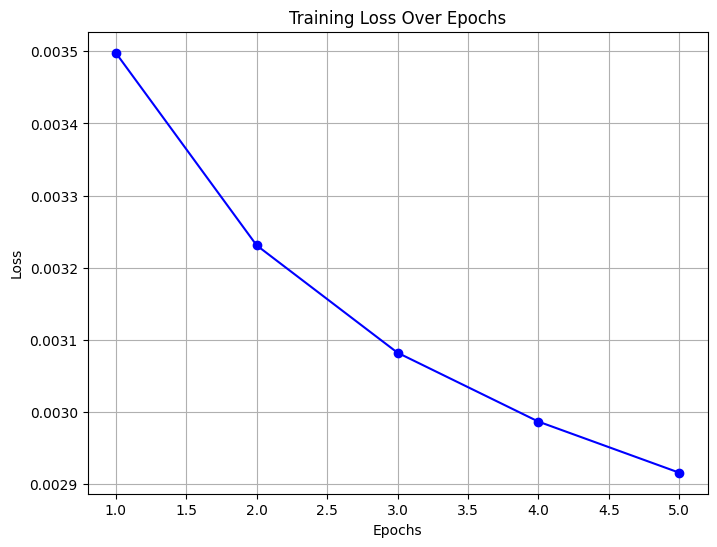

In [ ]:
# Training loop
num_epochs: int = 5
outputs: List[float] = []
epoch_losses: List[float] = []

for epoch in range(num_epochs):
    epoch_loss = 0
    progress_bar = tqdm(data_loader, desc=f"Epoch {epoch+1}/{num_epochs}", leave=True)

    for img, label in progress_bar:
        reconstructed_img = model2(img)
        loss = criterion(reconstructed_img, img)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        progress_bar.set_postfix(loss=f"{loss.item():.4f}")
    #  average loss for the epoch
    avg_loss = epoch_loss / len(data_loader)
    epoch_losses.append(avg_loss)
    print(f"Epoch : {epoch+1} | Avg Loss : {avg_loss:.4f}")
    outputs.append((epoch, img, reconstructed_img))

plot_loss(epoch_losses)

In [96]:
model_save_path = "cached_model/autoencoder_model.pth"
torch.save(model2.state_dict(), model_save_path)
print(f"Model saved to {model_save_path}")

Model saved to cached_model/autoencoder_model.pth


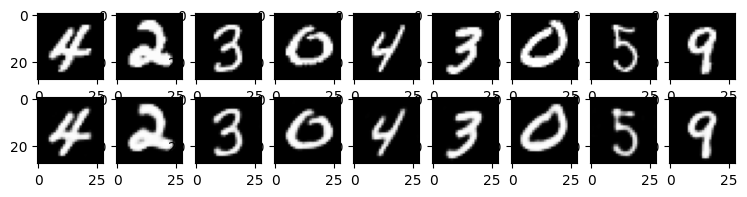

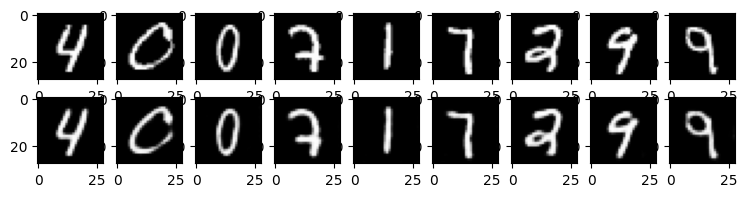

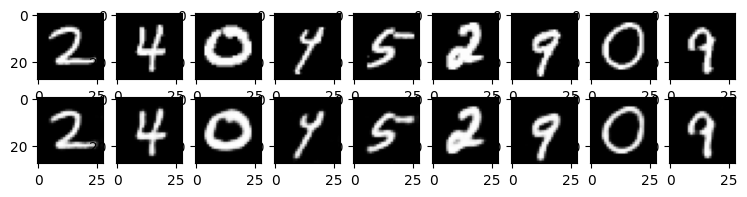

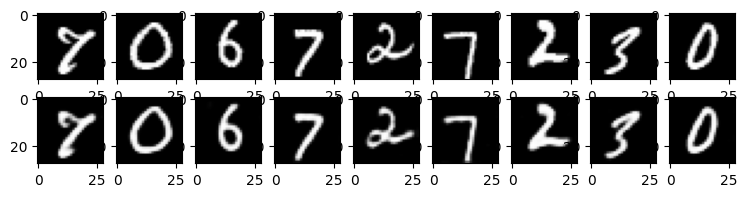

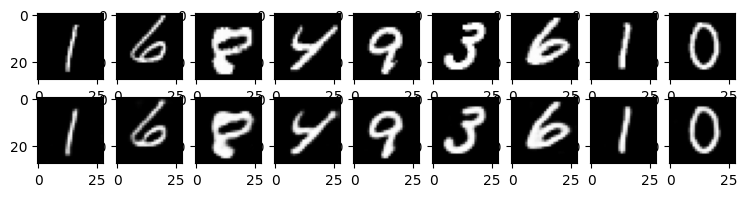

In [98]:
for k in range(0, num_epochs, 1):
    plt.figure(figsize=(9, 2))
    plt.gray()
    imgs = outputs[k][1].detach().numpy()
    recon = outputs[k][2].detach().numpy()
    for i, item in enumerate(imgs):
        if i >= 9:
            break
        plt.subplot(2, 9, i + 1)
        # item = item.reshape(-1, 28,28) # -> use for Autoencoder_Linear
        # item: 1, 28, 28
        plt.imshow(item[0])

    for i, item in enumerate(recon):
        if i >= 9:
            break
        plt.subplot(2, 9, 9 + i + 1)  # row_length + i + 1
        # item = item.reshape(-1, 28,28) # -> use for Autoencoder_Linear
        # item: 1, 28, 28
        plt.imshow(item[0])